<a href="https://colab.research.google.com/github/pccalegari/exemplos-CN/blob/main/C%C3%B3pia_de_MMq_Exemplos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exemplo 1:**

$$\begin{array}{c|cccccccc}
x_i & 1 & 2 & 3 & 4 & 5 &6 & 7 & 8\\
\hline
f(x_i) & 0.5 & 0.6 & 0.9 & 0.8 & 1.2 & 1.5 & 1.7 & 2 \\
\end{array}
$$

[[  8.  36.]
 [ 36. 204.]]
[ 9.2 50.5]
[0.175      0.21666667]
[0.175      0.21666667]


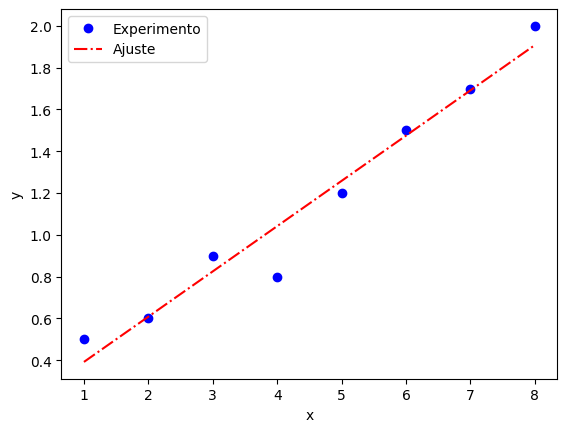

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def g(x, a):
    return a[0] + a[1]*x

def prod_esc(x,y):
    soma = 0
    n = len(x)
    for i in range(n):
        soma += x[i]*y[i]
    return soma

def main():
    x = np.array([1,2,3,4,5,6,7,8])
    y = np.array([0.5,0.6,0.9,0.8,1.2,1.5,1.7,2])
    n = len(x)
    xx = np.linspace(x[0],x[n-1],100)
    u = np.ones(n)
    N = np.zeros((2,2))
    b = np.zeros(2)
    a = np.zeros(2)
    N[0][0] = prod_esc(u,u)
    N[0][1] = prod_esc(u,x)
    N[1][0] = N[0][1]
    N[1][1] = prod_esc(x,x)
    b[0] = prod_esc(u,y)
    b[1] = prod_esc(x,y)
    print(N)
    print(b)
    a[0] = (N[1][1]*b[0] - b[1]*N[0][1])/(N[0][0]*N[1][1] - N[0][1]**2)
    a[1] = (N[0][0]*b[1] - b[0]*N[0][1])/(N[0][0]*N[1][1] - N[0][1]**2)
    z = np.linalg.solve(N,b)
    print(z)
    print(a)
    plt.figure(1)
    plt.plot(x, y, 'bo', label = 'Experimento')
    plt.plot(xx, g(xx,a), 'r-.', label = 'Ajuste')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


main()


**Exemplo 2:**

$$\begin{array}{c|cccccccc}
x_i & 0 & 1.5 & 3 & 4.5 &6\\
\hline
f(x_i) & 1 & 1.57 & 2 & 4.3 & 7 \\
\end{array}
$$

[[67.5         1.94856894]
 [ 1.94856894  2.95145074]]
[69.705       4.94584248]
Residuo:  0.0003196239999689424
[1.0034159  1.01327032]


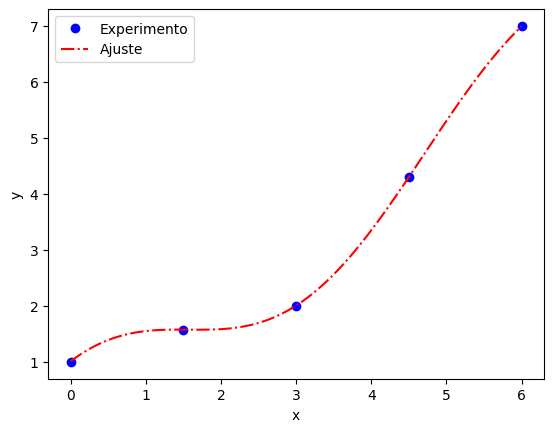

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def g(x, a):
    return a[0]*x + a[1]*np.cos(x)

def residuo(x, y, a):
    soma = 0
    n = len(x)
    for i in range(n):
        soma += (y[i] - g(x[i],a))**2
    return soma


def prod_esc(x,y):
    soma = 0
    n = len(x)
    for i in range(n):
        soma += x[i]*y[i]
    return soma

def main():
    x = np.array([0,1.5,3,4.5,6])
    y = np.array([1,1.57,2,4.3,7])
    n = len(x)
    xx = np.linspace(x[0], x[n-1], 100)
    g0 = np.zeros(n)
    g1 = np.zeros(n)
    for i in range(n):
        g0[i] = x[i]
        g1[i] = np.cos(x[i])

    N = np.zeros((2,2))
    b = np.zeros(2)
    a = np.zeros(2)
    N[0][0] = prod_esc(g0,g0)
    N[0][1] = prod_esc(g0,g1)
    N[1][0] = N[0][1]
    N[1][1] = prod_esc(g1,g1)
    b[0] = prod_esc(g0,y)
    b[1] = prod_esc(g1,y)
    print(N)
    print(b)
    a[0] = (N[1][1]*b[0] - b[1]*N[0][1])/(N[0][0]*N[1][1] - N[0][1]**2)
    a[1] = (N[0][0]*b[1] - b[0]*N[0][1])/(N[0][0]*N[1][1] - N[0][1]**2)
    z = np.linalg.solve(N,b)
    print("Residuo: ",residuo(x, y, a))
    print(a)
    plt.figure(1)
    plt.plot(x, y, 'bo',label='Experimento')
    plt.plot(xx, g(xx,a), 'r-.',label='Ajuste')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()


main()
